# Assingment 5 : Multiple Linear Regression - Profit Prediction Model

# Problem Statement: 
## Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

## Features

#### R&D Spend -- Research and devolop spend in the past few years
#### Administration -- spend on administration in the past few years
#### Marketing Spend -- spend on Marketing in the past few years
#### State -- states from which data is collected
#### Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


## Step 1 : Importing Data

In [2]:
df = pd.read_csv('D:/Assignment DS/5TH/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

## Step 2 : Descriptive Analysis

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

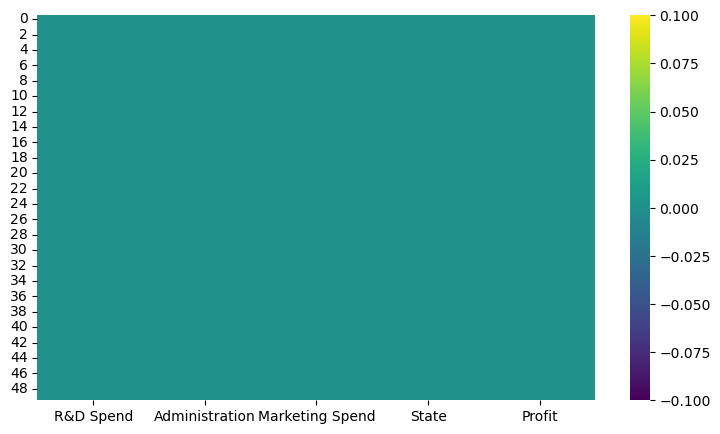

In [7]:
# To confirm availablity of missing values in data set

plt.figure(figsize=(9,5))
sns.heatmap(df.isnull(), cmap='viridis')

### Observation : There is no missing value available in dataset.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

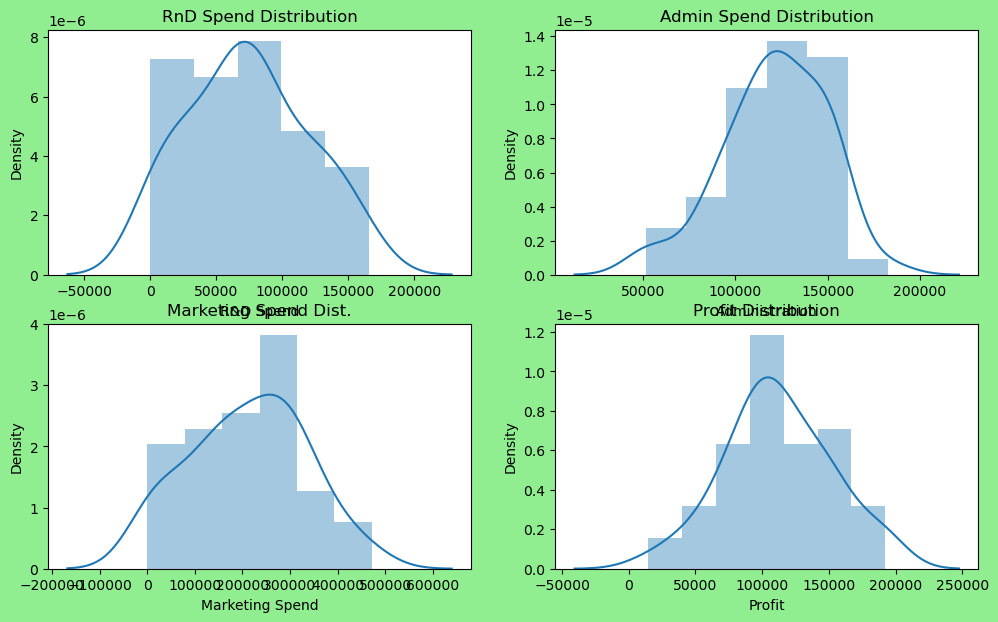

In [8]:
# Distribution Plots
plt.figure(figsize=(12,7), facecolor='lightgreen')
plt.subplot(221)
sns.distplot(df['R&D Spend'])
plt.title('RnD Spend Distribution')

plt.subplot(222)
sns.distplot(df['Administration'])
plt.title('Admin Spend Distribution')

plt.subplot(223)
sns.distplot(df['Marketing Spend'])
plt.title('Marketing Spend Dist.')

plt.subplot(224)
sns.distplot(df['Profit'])
plt.title('Profit Distribution')

plt.show()

### Observation : Data seems to be approximetly normally distributed

## Step 3 : EDA

In [9]:
# Rename the column
df1 = df.copy()
df1 =df1.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df1.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### As there is no missing values available, we dont need to perform any special operation required to adjust missing values.

<AxesSubplot:ylabel='state'>

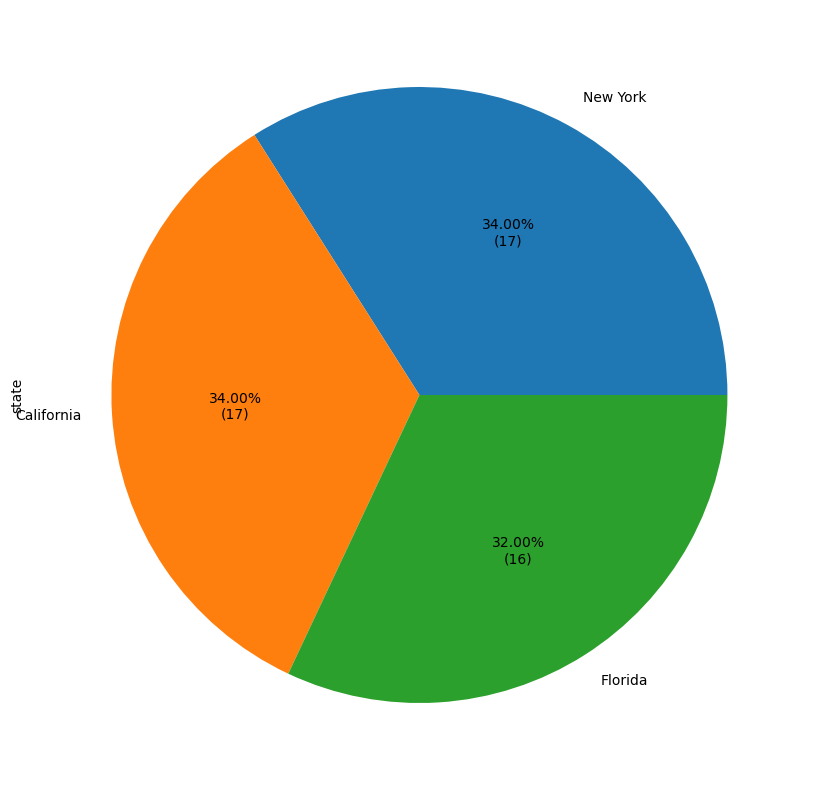

In [10]:
# Lets check impact of state on profit (target variable)
# pie chart
plt.figure(figsize=(10,10))
df1['state'].value_counts().plot(kind='pie',autopct = lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['state'].value_counts().sum())))

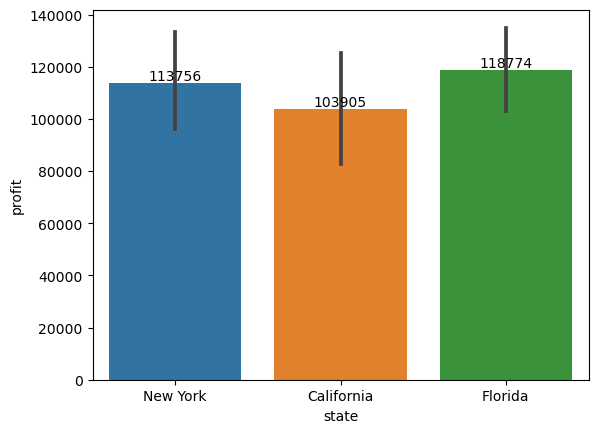

In [11]:
ax = sns.barplot(x = "state", y = 'profit', data = df1)
for i in ax.containers:
    ax.bar_label(i,)

### Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation. So, we are going to drop this feature while building our model as it is irrelavent function.

In [12]:
df2 = df1.drop('state', axis= 1)
df2.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Step 4 : Correlation analysis

In [13]:
df2.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

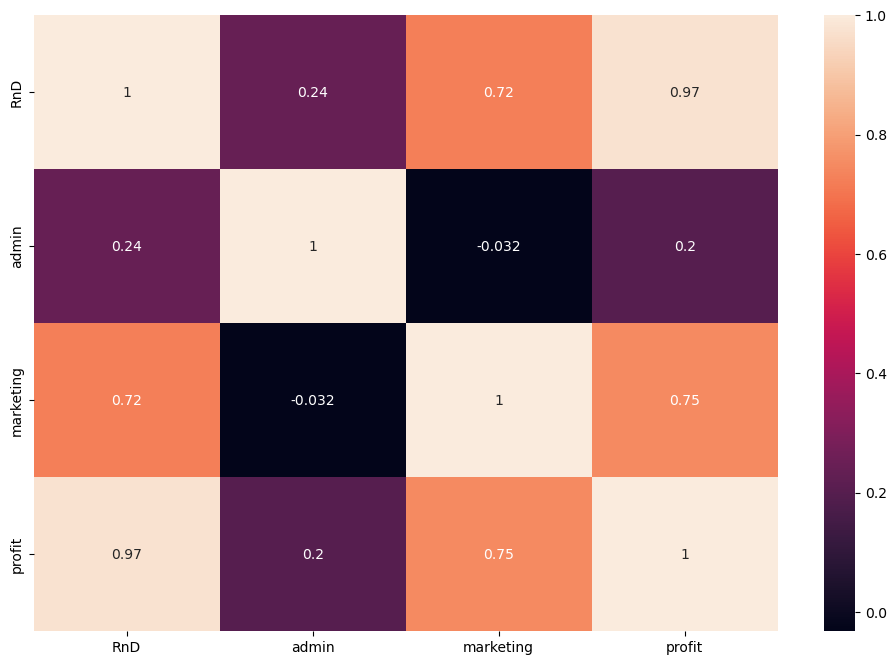

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df2.corr(),
    annot=True)

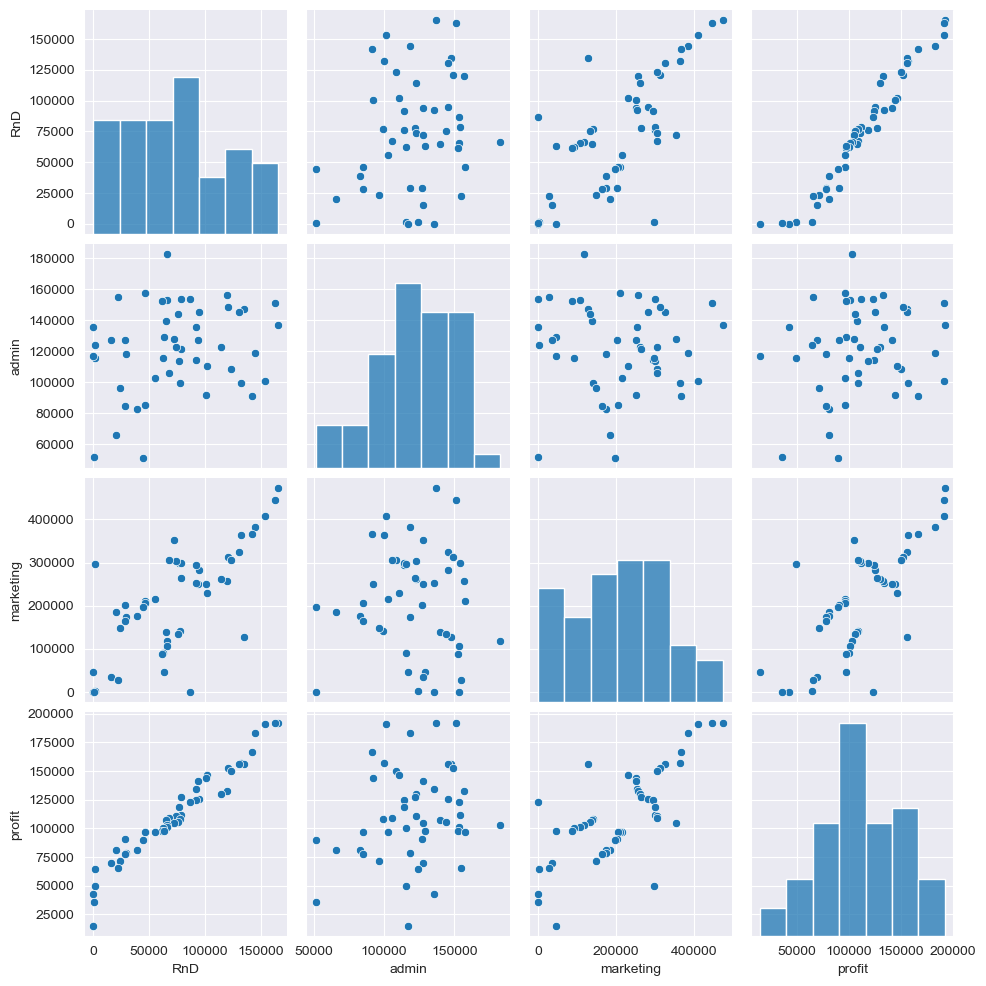

In [15]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df2)

### Observation : RnD values shows strong positive correlation with target variable profit. Also marketting values does have moderately good relation with profit.

## Step 5: Model Building

In [16]:
model1 = smf.ols('profit ~ RnD + admin + marketing', data = df2).fit()

In [17]:
model1.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        10:13:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RnD          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64


In [20]:
#R squared values
(model1.rsquared, model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Observation : p-value of admin and marketing variable is too high, which indicates that the regression coefficient of these two variables are not that significant or trustworthy. We have to check their independent impact on target variable by creating Simple Linear Regresion model. Also need to check impact on target variable by combination of both only.

In [21]:
# SLR Model - profit ~ admin (r-sqaured value, p-value, t-value)

ml_admin = smf.ols('profit ~ admin', data= df2).fit()
print (ml_admin.tvalues, '\n', ml_admin.pvalues)

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


In [22]:
(ml_admin.rsquared , ml_admin.rsquared_adj)

(0.04028714077757223, 0.020293122877105052)

#### Observation : Admin spend is not having strong correlation with target variable (profit). 

In [23]:
# SLR Model - profit ~ marketing (r-sqaured value, p-value, t-value)

ml_mrkt = smf.ols('profit ~ marketing', data= df2).fit()
print (ml_mrkt.tvalues, '\n', ml_mrkt.pvalues)

Intercept    7.808356
marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
marketing    4.381073e-10
dtype: float64


In [24]:
(ml_mrkt.rsquared, ml_mrkt.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

#### Observation : p-values for regression coefficient of marketing variable are too low so, we can trust on regression coefficient. But, rsquared value is moderately storng for this model.

In [25]:
# Combine model - proft ~ admin + marketing

ml_combine = smf.ols('profit ~ admin + marketing', data= df1).fit()
print(ml_combine.tvalues, '\n', ml_combine.pvalues)

Intercept    1.142741
admin        2.467779
marketing    8.281039
dtype: float64 
 Intercept    2.589341e-01
admin        1.729198e-02
marketing    9.727245e-11
dtype: float64


In [26]:
(ml_combine.rsquared, ml_combine.rsquared_adj)

(0.6097229746770663, 0.593115441684601)

#### Observation : we get better rsquared value when we treate both variables together. Also, their p-values confirms the significance of their regression coefficient.

## Model Validation Techniques

### Here we will try to check two assumption of linear regression model. 1) Collinearity of variable by Calculating VIF 2) Distibution of residuals.

In [27]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols('RnD ~ admin + marketing',data= df2).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('admin ~ RnD + marketing',data= df2).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('marketing ~ RnD + admin',data= df2).fit().rsquared
vif_m = 1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD' , 'admin' , 'marketing'],'Vif':[vif_r, vif_a, vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD,2.468903
1,admin,1.175091
2,marketing,2.326773


### Observation : None of the variable has VIF > 5, No Collinearity, so we can consider all varaibles in Regression equation.

In [28]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

residuals = np.round(model1.resid, 3)
residuals.head()

0    -259.423
1    2635.292
2    8903.111
3    9205.290
4   -5951.574
dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

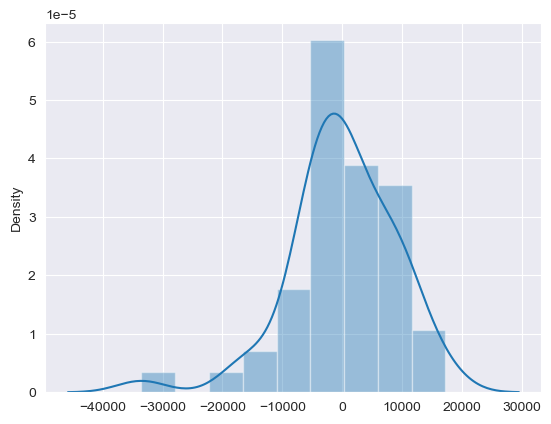

In [29]:
sns.distplot(residuals)

In [30]:
residuals.mean()

0.0

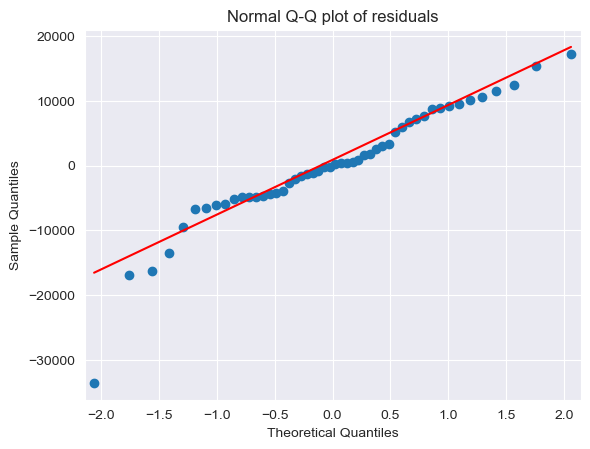

In [31]:
# Draw Q-Q Plot

import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

#### Observation : The residuals are normally distributed. Only one or two records are considered as a outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9b567b490>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9b567ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9b567b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9b567bfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9b56882e0>],
 'means': []}

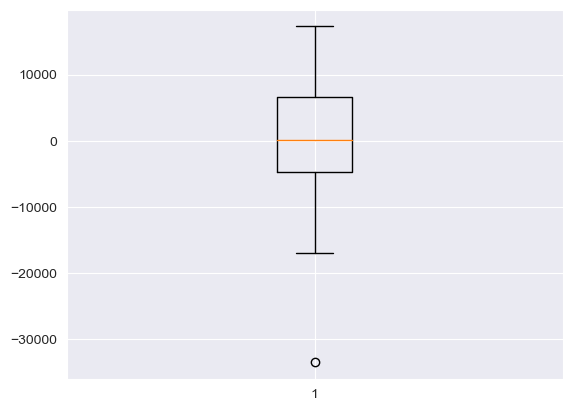

In [32]:
# boxpplot to explore is there any outlier in residual

plt.boxplot(model1.resid)

In [33]:
outlier = list(np.where(model1.resid<-30000))
outlier

[array([49], dtype=int64)]

In [34]:
predictions = model1.fittedvalues
predictions.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

In [35]:
pd.DataFrame({'Actual' : df1.profit,
             'Predicted' : predictions,
             'Error' : residuals})

,Actual,Predicted,Error
0,192261.83,192521.252890,-259.423
1,191792.06,189156.768232,2635.292
2,191050.39,182147.279096,8903.111
3,182901.99,173696.700026,9205.290
4,166187.94,172139.514183,-5951.574
5,156991.12,163580.780571,-6589.661
6,156122.51,158114.096669,-1991.587
7,155752.60,160021.363048,-4268.763
8,152211.77,151741.699699,470.070
9,149759.96,154884.684110,-5124.724


## Residual Plot for Homoscedasticity

In [36]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standardized_values(vals) :
    return (vals - vals.mean())/vals.std() # User defined z = (x - mu)/sigma

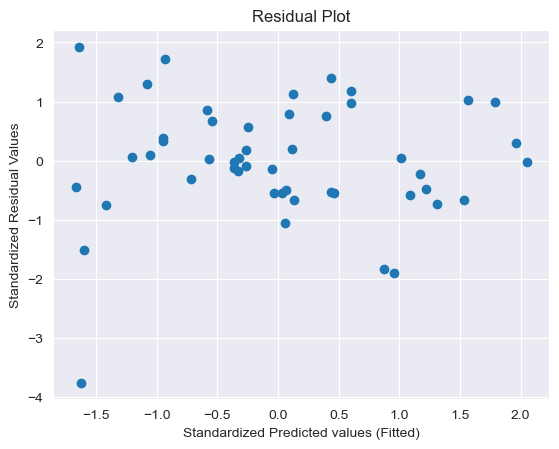

In [37]:
plt.scatter(get_standardized_values(predictions),
           get_standardized_values(residuals))
plt.title('Residual Plot')
plt.xlabel('Standardized Predicted values (Fitted)')
plt.ylabel('Standardized Residual Values')
plt.show()

### Observation : We can see there is not any relation between predicted target varible and error, which measn constant variance (Homoscedasticity) in Error.

## Test for residual vs regressors

eval_env: 1


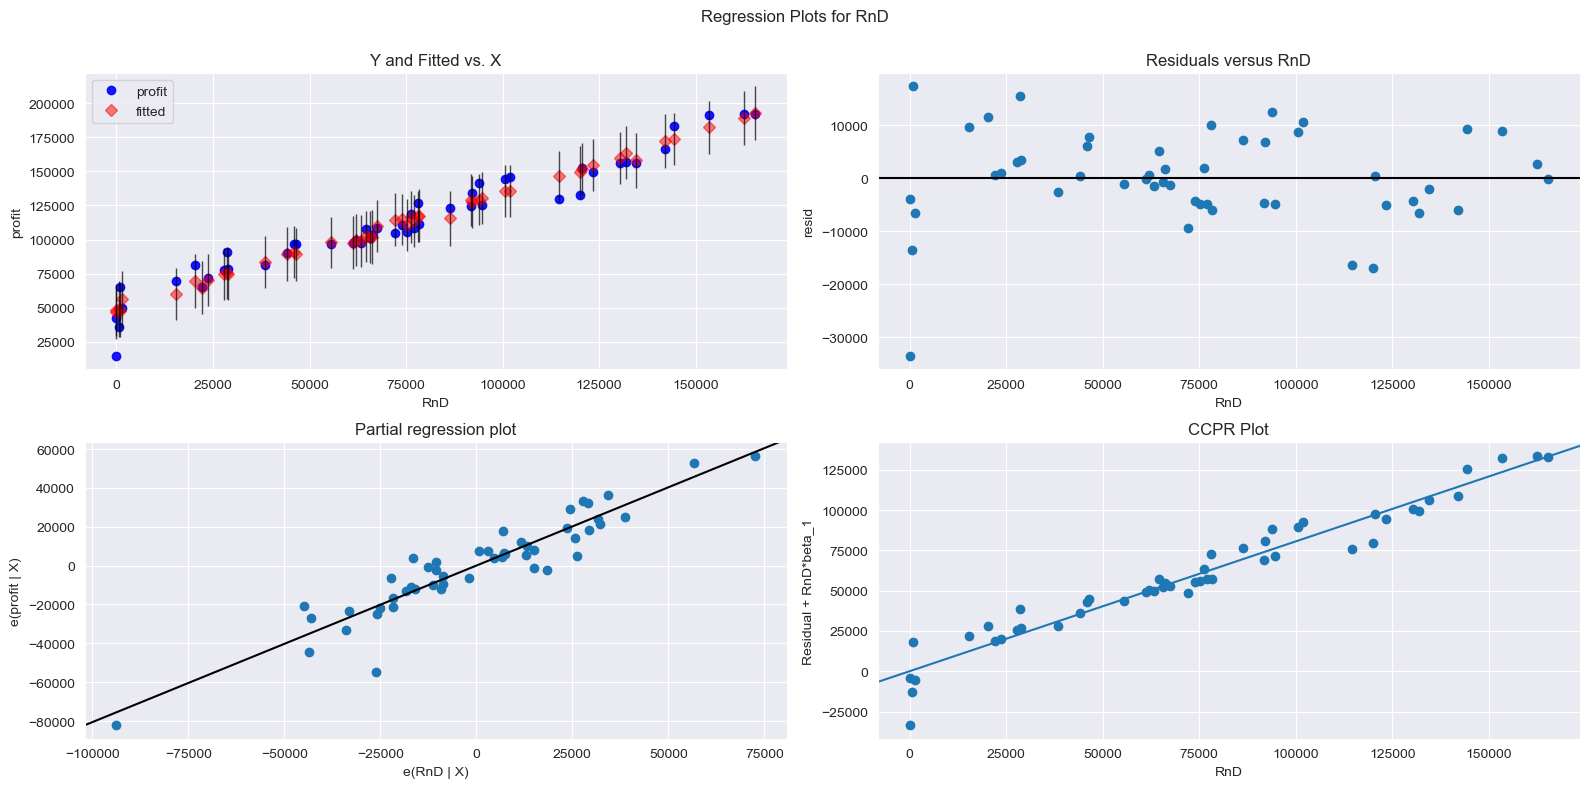

In [38]:
# use residual regressor plot code: graphics.plot_regress_exog(model,'x', fig)

fig = plt.figure(figsize = (16,8))
fig = sm.graphics.plot_regress_exog(model1,'RnD', fig = fig)
plt.show()

eval_env: 1


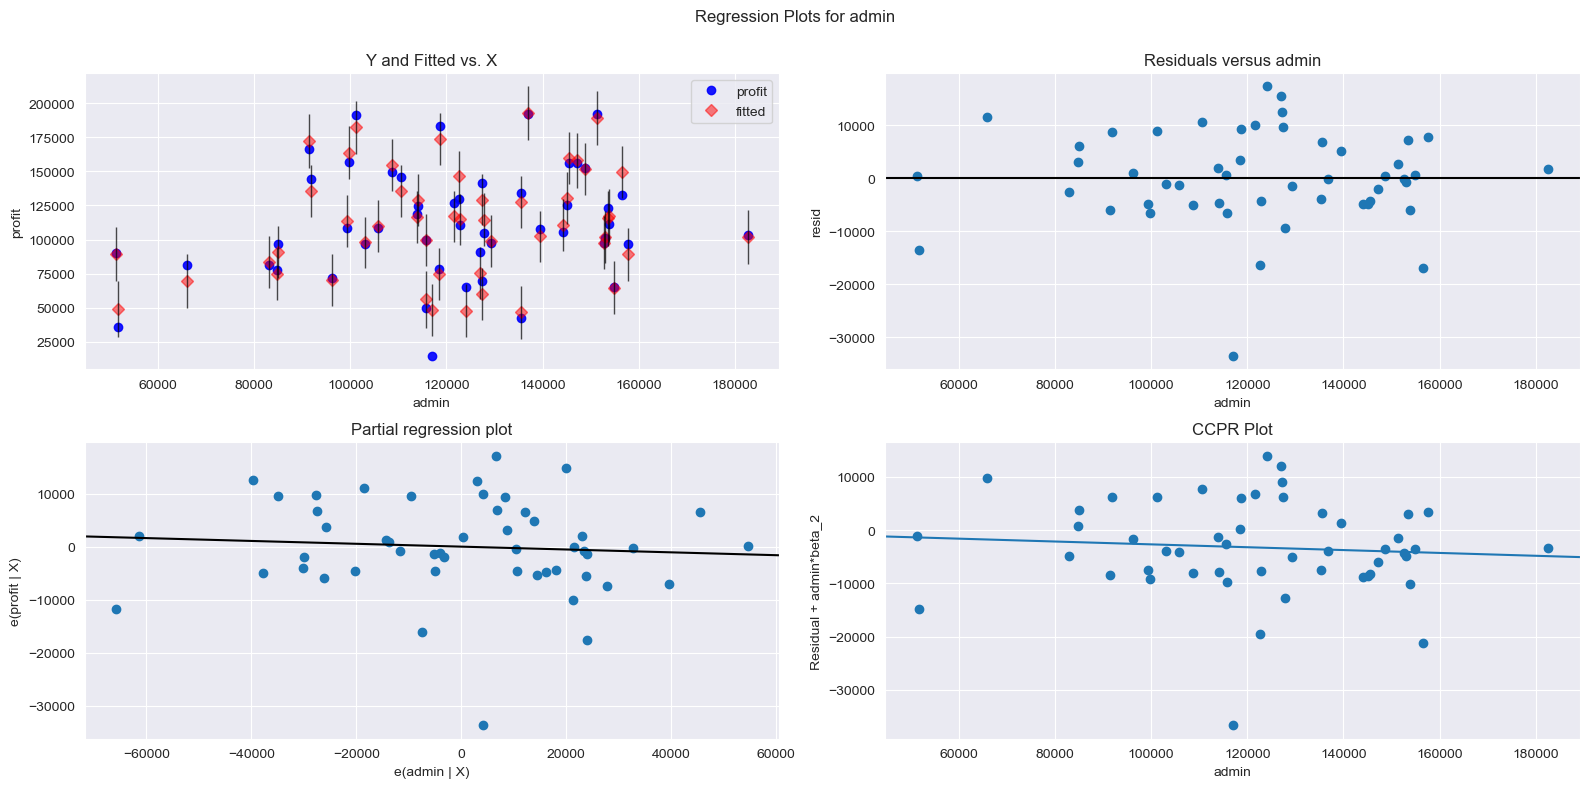

In [39]:
fig = plt.figure(figsize= (16,8))
sm.graphics.plot_regress_exog(model1,'admin',fig= fig)
plt.show()

eval_env: 1


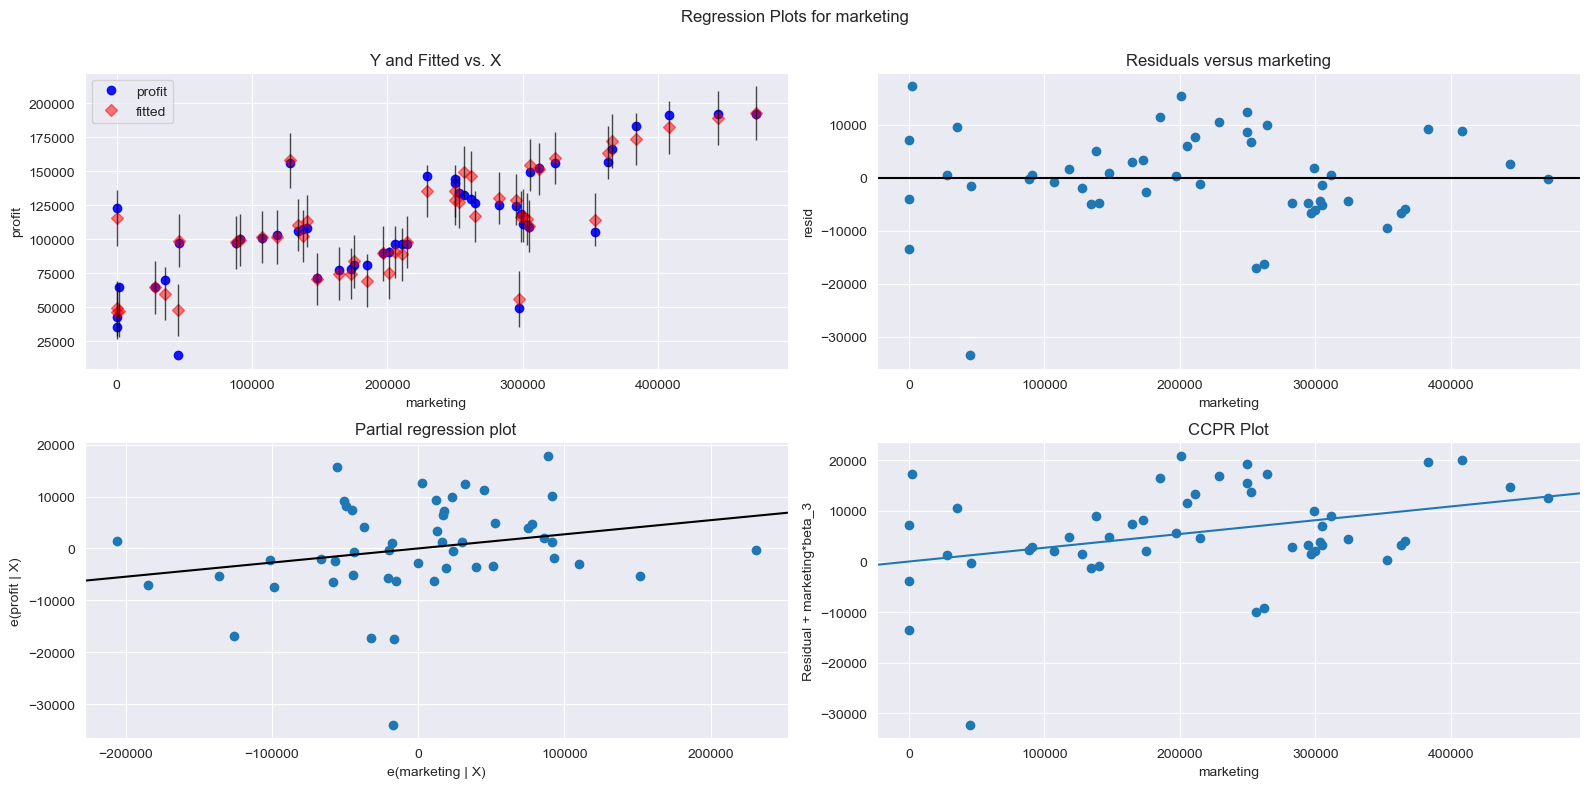

In [40]:
fig = plt.figure(figsize= (16,8))
fig = sm.graphics.plot_regress_exog(model1,'marketing', fig = fig)
plt.show()

## Model Deletion Diagnostics (Checking outliers or Influencers)

#### We will check Cook's Distance and Leverage value

In [41]:
# if cook's distance is greater than 1 then the corresponding record is outlier

(c,_) =model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

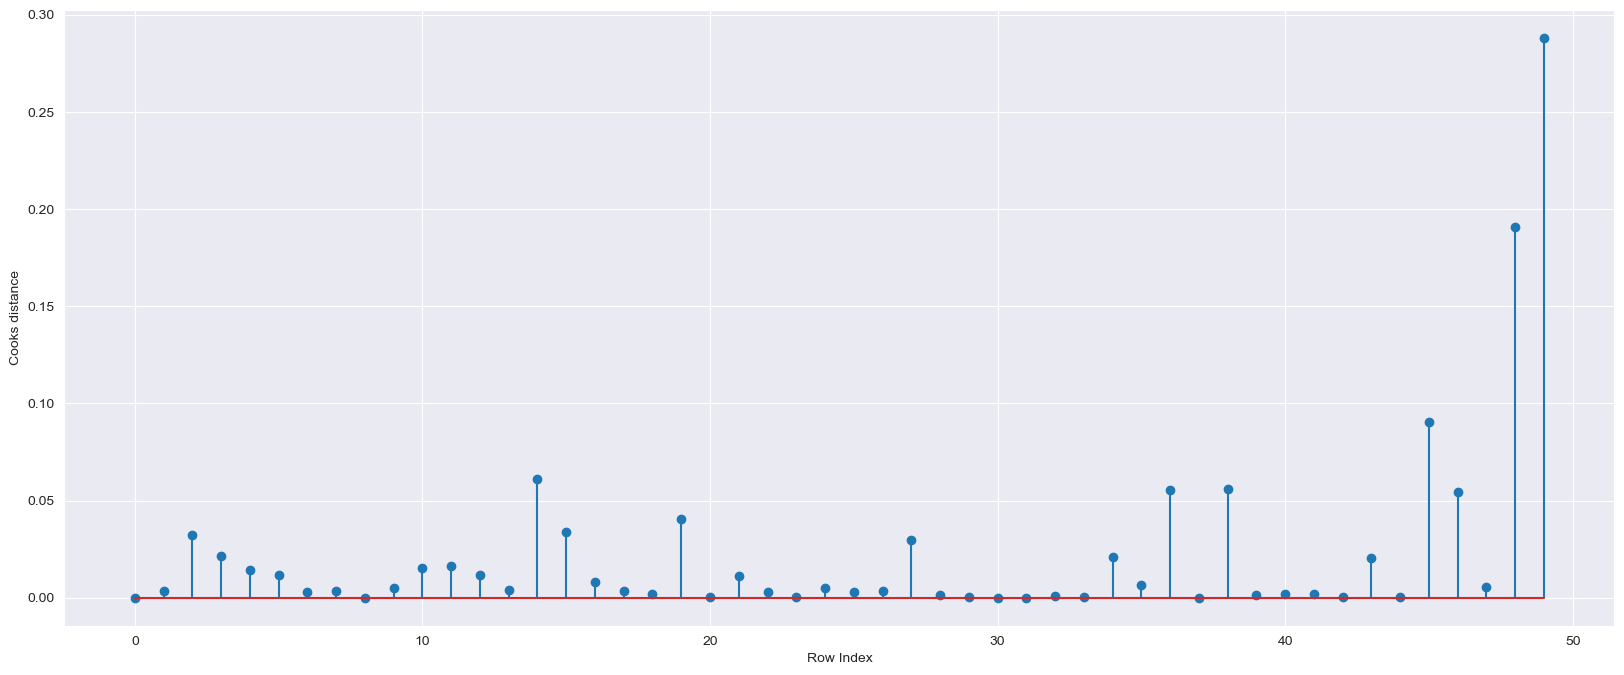

In [42]:
# Plot the influencer using stem plot
fig = plt.figure(figsize = (20,8))
plt.stem(np.arange(len(df2)),np.round(c, 5))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')
plt.show()

In [43]:
# Index and value for the influencer where c > 0.5

np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

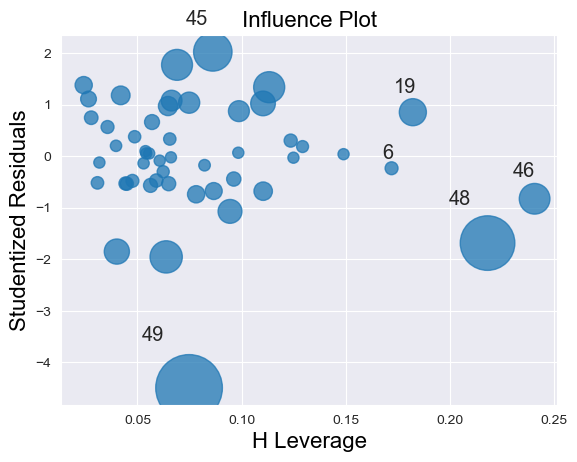

In [44]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model1)
plt.show()


In [45]:
# Leverage Cut-off value =  3*(k+1)/n
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

### Observation: All the points are below our Leverage cut-off line. So, we can say that there are no influencer present in our model.

# Feature Engineering

### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

## Applying Standard Scaler Transformation

### For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
### x_scaled = x – mean/std_dev
### However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [46]:
from sklearn.preprocessing import StandardScaler

col_names = df2.columns
features = df2[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,RnD,admin,marketing,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [47]:
# Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 RnD          0.0
admin       -0.0
marketing   -0.0
profit      -0.0
dtype: float64 
Standard Devaition 
 RnD          1.0
admin        1.0
marketing    1.0
profit       1.0
dtype: float64 1


In [49]:
### Prepare model with Standard Scalar Transformed Data

model2  = smf.ols('profit ~ RnD + admin + marketing', data= df_standard_scaled).fit()

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        12:34:37   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.343e-16      0.033  -1.63e-14      1.000      -0.066       0.066
RnD            0.9176      0.051     17.846      0.000       0.814       1.021
admin         -0.0186      0.035     -0.526      0.602      -0.090       0.053
marketing      0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model2.params

Intercept   -5.342948e-16
RnD          9.175798e-01
admin       -1.864043e-02
marketing    8.261087e-02
dtype: float64

In [52]:
model2.tvalues , model2.pvalues

(Intercept   -1.632823e-14
 RnD          1.784637e+01
 admin       -5.255068e-01
 marketing    1.655077e+00
 dtype: float64,
 Intercept    1.000000e+00
 RnD          2.634968e-22
 admin        6.017551e-01
 marketing    1.047168e-01
 dtype: float64)

### R-Squared values are too good also the the AIC & BIC score are very much close to 0. But, the p-values for admin and marketing features are more than that of level of significance (alpha value). So, we should try to build model considering RnD and Marketting together.

## Model3 : profit ~ RnD + marketing 

In [53]:
model3 = smf.ols('profit ~ RnD + marketing', data= df_standard_scaled).fit()

In [54]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.16e-31
Time:                        14:10:33   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.378e-16      0.032  -1.66e-14      1.000      -0.065       0.065
RnD            0.9072      0.047     19.266      0.000       0.812       1.002
marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets try Square-Root Transformation

In [60]:
df_sqrt_transformed = pd.DataFrame()
df_sqrt_transformed['profit'] = np.sqrt(df2['profit'])
df_sqrt_transformed['RnD'] = np.sqrt(df2['RnD'])
df_sqrt_transformed['admin'] = np.sqrt(df2['admin'])
df_sqrt_transformed['marketing'] = np.sqrt(df2['marketing'])

In [61]:
model4 = smf.ols('profit ~ RnD + admin + marketing', data= df_sqrt_transformed).fit()

In [62]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.22e-26
Time:                        15:37:13   Log-Likelihood:                -212.39
No. Observations:                  50   AIC:                             432.8
Df Residuals:                      46   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    188.0384     22.340      8.417      0.000     143.070     233.007
RnD            0.5775      0.035     16.293      0.000       0.506       0.649
admin         -0.0306      0.064     -0.480      0.634      -0.159       0.098
marketing      0.0149      0.021      0.711      0.481      -0.027       0.057
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               26.638
Skew:                           0.133   Prob(JB):                     1.64e-06
Kurtosis:                       6.566   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Selection by comparing RMSE values of model

In [67]:
from sklearn.metrics import mean_squared_error

In [69]:
model1_pred_y = model1.predict(df2[['RnD', 'admin', 'marketing']])
model2_pred_y = model2.predict(df_standard_scaled[['RnD','admin','marketing']])
model3_pred_y = model3.predict(df_standard_scaled[['RnD','admin','marketing']])
model4_pred_y = np.square(model4.predict(df_sqrt_transformed[['RnD','admin','marketing']]))

In [70]:
model1_rmse = np.sqrt(mean_squared_error(df2['profit'], model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df_standard_scaled['profit'], model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(df_standard_scaled['profit'], model3_pred_y))
model4_rmse = np.sqrt(mean_squared_error(df_sqrt_transformed['profit'], model4_pred_y))

In [74]:
models = {'Model Name': ['model1','model2','model3','model4'],
          'R-squared' : [model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared],
          'R-squared_Adj' : [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj],
          'RMSE' : [model1_rmse, model2_rmse, model3_rmse, model4_rmse]}

table = pd.DataFrame(models)
table

,Model Name,R-squared,R-squared_Adj,RMSE
0,model1,0.950746,0.947534,8855.344489
1,model2,0.950746,0.947534,0.221932
2,model3,0.950450,0.948342,0.222598
3,model4,0.930544,0.926014,117634.796566


# As model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values. 
# Model2 is standard scalar transfomed model
